<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.2 Spectral Graph Bipartitioning**

Grpah partition aims to find out a partition such that the cut (the total number of edges between two disjoint set of nodes) is minimized. For a weighted graph, given a bipartition into disjoint V1 and V2 the cut between them can be defined as 

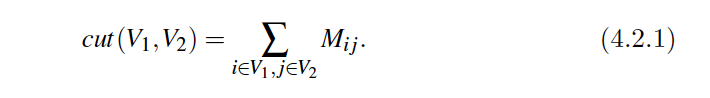

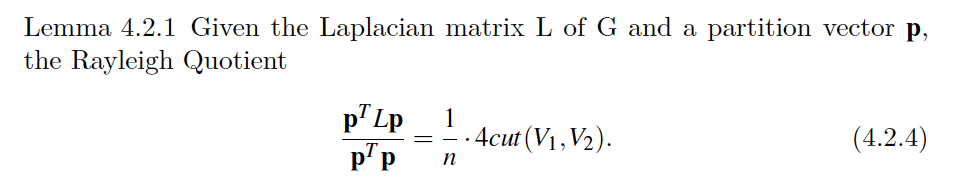

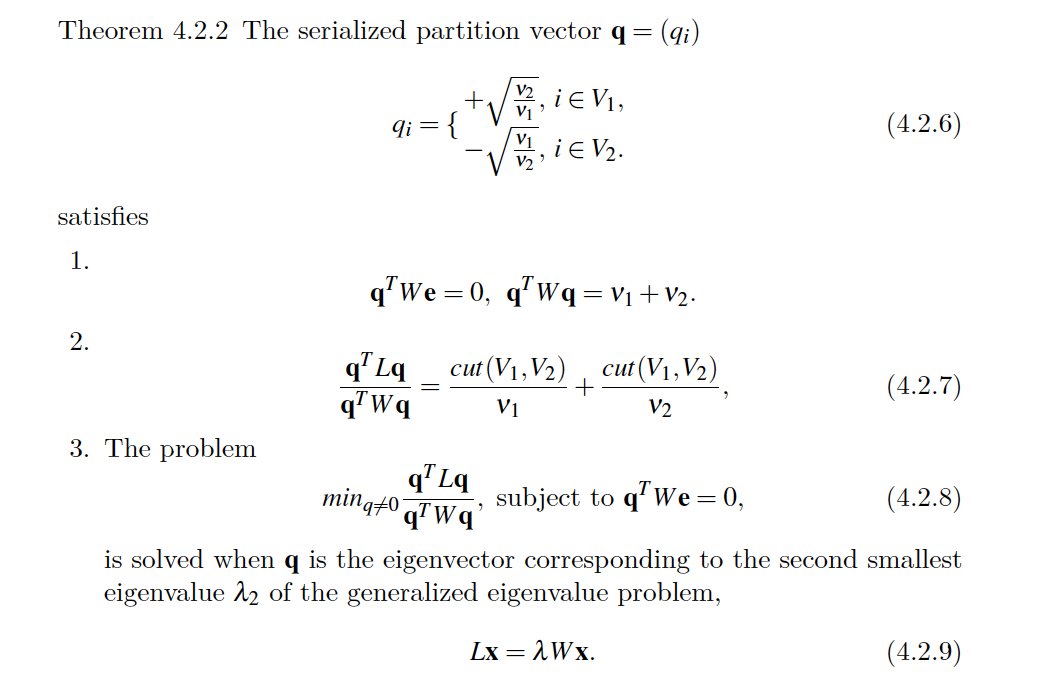

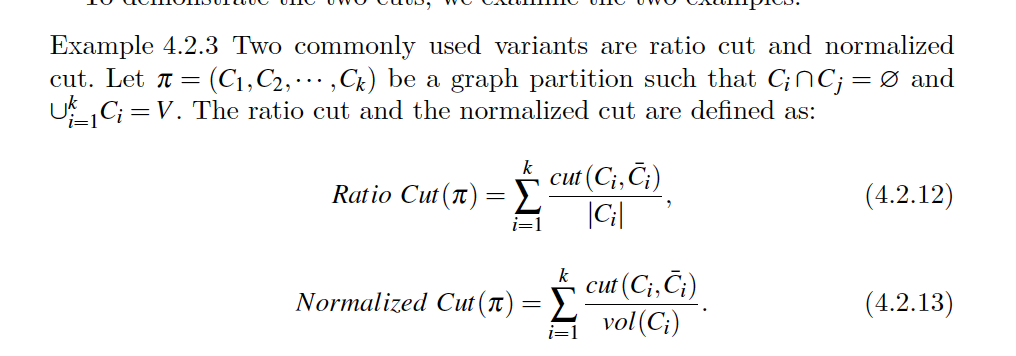

[Text(0.5, 1.0, 'K-Means Clustering')]

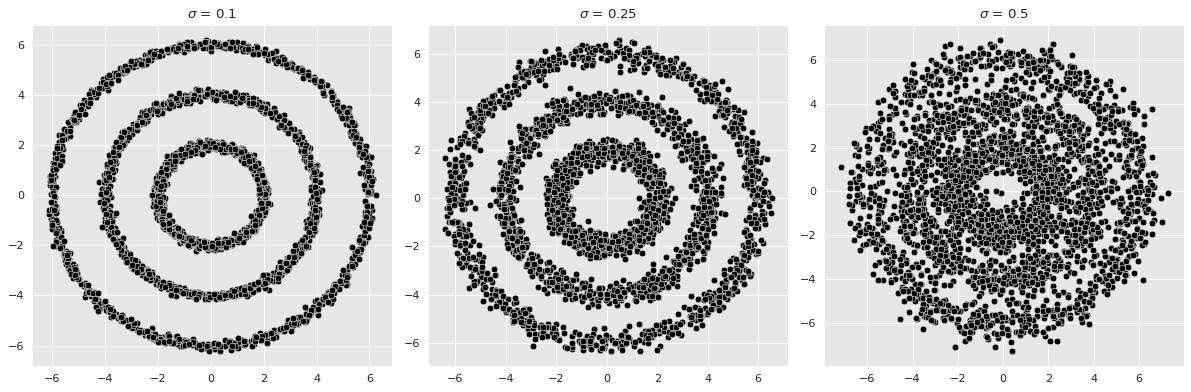

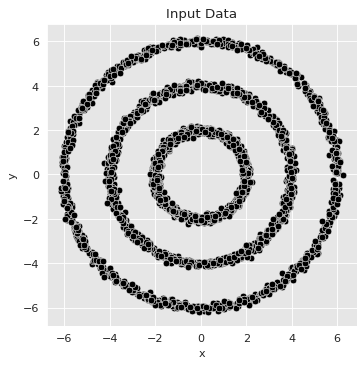

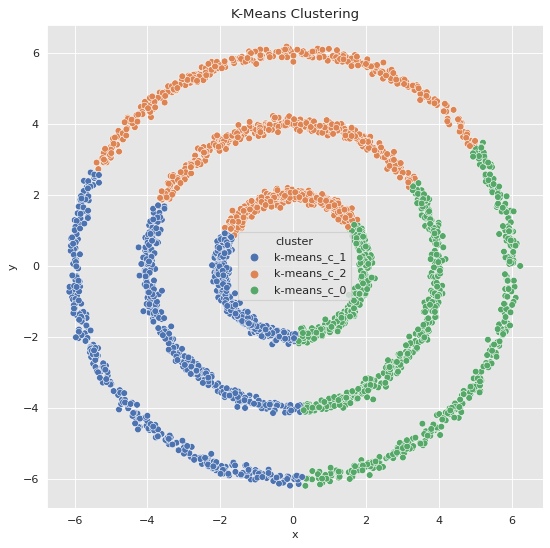

In [17]:
import pandas as pd #import pandas library
import numpy as np #improt numpy library
import matplotlib.pyplot as plt #import matplotlib library
import seaborn as sns #import seaborn library

sns.set_style('darkgrid', {'axes.facecolor': '.9'}) #sets color palette of graph
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')


%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from itertools import chain
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
  

def generate_circle_sample_data(r, n, sigma): #function generates a circle plot
  """Generate circle data with random Gaussian noise."""
  angles = np.random.uniform(low=0, high=2*np.pi, size=n)

  x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
  y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

  x = r*np.cos(angles) + x_epsilon
  y = r*np.sin(angles) + y_epsilon
  return x, y


def generate_concentric_circles_data(param_list):  #function generates concentric circle plot
    """Generates many circle data with random Gaussian noise."""
    coordinates = [ 
        generate_circle_sample_data(param[0], param[1], param[2])
     for param in param_list
    ]
    return coordinates

# Set global plot parameters. 
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

# Number of points per circle. 
n = 1000
# Radius. 
r_list =[2, 4, 6]
# Standard deviation (Gaussian noise) 
sigmas = [0.1, 0.25, 0.5]

param_lists = [[(r, n, sigma) for r in r_list] for sigma in sigmas] 
# We store the data on this list.
coordinates_list = []

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, param_list in enumerate(param_lists):

    coordinates = generate_concentric_circles_data(param_list)

    coordinates_list.append(coordinates)
    
    ax = axes[i]
    
    for j in range(0, len(coordinates)):
    
        x, y = coordinates[j]
        sns.scatterplot(x=x, y=y, color='black', ax=ax)
        ax.set(title=f'$\sigma$ = {param_list[0][2]}')

plt.tight_layout()

coordinates = coordinates_list[0]

def data_frame_from_coordinates(coordinates): 
    """From coordinates to data frame."""
    xs = chain(*[c[0] for c in coordinates])
    ys = chain(*[c[1] for c in coordinates])

    return pd.DataFrame(data={'x': xs, 'y': ys})

data_df = data_frame_from_coordinates(coordinates)

# Plot the input data.
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='x', y='y', color='black', data=data_df, ax=ax)
ax.set(title='Input Data')

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_df)
    Sum_of_squared_distances.append(km.inertia_)

kmeans = KMeans(n_clusters=3) 
kmeans.fit(data_df)

cluster = kmeans.predict(data_df)

cluster = ['k-means_c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=data_df.assign(cluster = cluster), hue='cluster', ax=ax)
ax.set(title='K-Means Clustering')